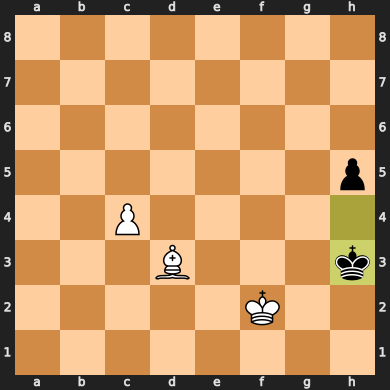

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import chess

from env import *
env = Chess_env()
obs = env.reset()

from deepQ import *
from mcts import *


env.board

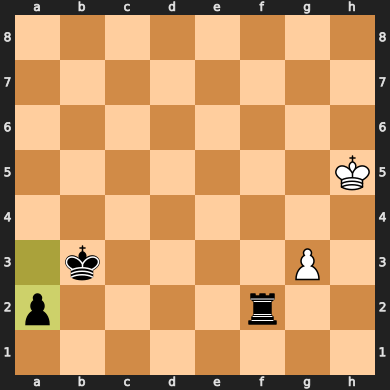

In [2]:
env.reset()

env.board

In [5]:
model = DeepQ(env, dropout_rate=0., n_channels=128, n_residual=5)

# model.model = keras.models.load_model('pretrained')
# model.target_model = keras.models.load_model('pretrained')

model.head.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 8, 8, 16)]   0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 8, 8, 128)    18560       input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 8, 8, 128)    512         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 8, 8, 128)    0           batch_normalization_12[0][0]     
____________________________________________________________________________________________

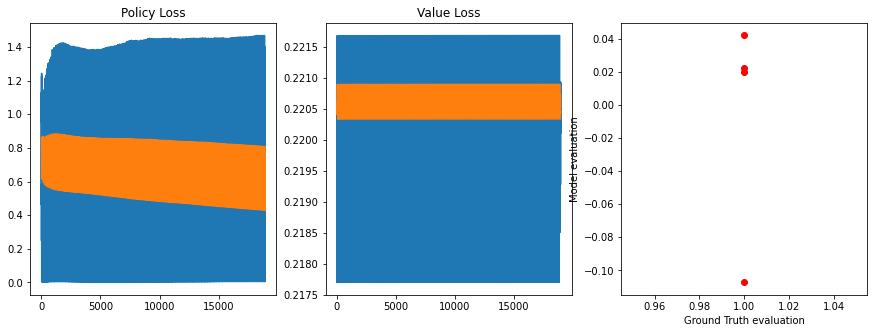

  2%|▏         | 148/6400 [9:00:08<965:59:43, 556.24s/it]

Running episode 0/6400


In [6]:
if True:
    model.pre_train(
            max_epoch= 200*32, 
            batch_size = 4,    
            max_steps_per_episode = 30, 
            learning_rate = 1e-4,
            update_target = 1000000000000000,
            jupyter=True,
            random_best_action=0.3,
            n_top_move= 3, 
            name='pretrained'
        )

In [ ]:
%%time
model.predict_move_to_play_MCTS(env,100)

Wall time: 4.27 s


'd5c6'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model.train(
    max_epoch = 3000, 
    epsilon_random_frames = 0,
    epsilon_greedy_frames = 5,
    epsilon = 0.01,
    epsilon_min = 0.,
    batch_size = 16,
    max_steps_per_episode = 50,
    learning_rate=1e-2,
    MCTS_iterations=100,
    name='model_long_training',
    update_target=16*2,
    elo = 400
    )

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . r . . . P .
. . . . . . . p
. . . k . . . P
. . . . . . K .
. . . . . . . .


 41%|████      | 20/49 [01:17<01:51,  3.85s/it]

Lost
0.0


. . k . . . . .
R . P . . . . .
. . . b . . . .
. . . . . . . .
. . . . . . . .
. . B . . . . .
. . K . . . . .
. . . . . . . .


100%|██████████| 49/49 [02:50<00:00,  3.49s/it]


. . . . . . . .
. . . . . . . .
. . . . . p . .
K . . . . . . .
b n . . . . . .
. . . . . . k .
. . . . . . . p
. . . . . . . .


 18%|█▊        | 9/49 [00:35<02:36,  3.91s/it]


KeyboardInterrupt: 

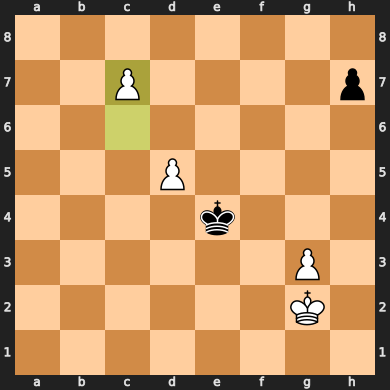

In [ ]:
model.env.board 

In [ ]:
env = Chess_env('8/5P1k/P3K3/8/3B4/8/8/8 w - - 1 78')
env.board

In [ ]:
model.predict_move_to_play_MCTS(model.env, white=True)

In [ ]:
m = MCTS(model,env, {'num_simulations':100})
x = m.run(env.board_feat.board, 1)

In [ ]:
stockfish = Stockfish(path="C:/Users/Philippe/Downloads/stockfish_13_win_x64_avx2/stockfish_13_win_x64_avx2")


In [ ]:

n_won = 0
for _ in range(100):
    _ = env.reset()
    for i in tqdm(range(150)):

        if i%2 ==0:
            action = model.predict_move_to_play_MCTS(2,env,100)
        else:
            stockfish.set_elo_rating(100)
            stockfish.set_fen_position(env.board.fen())
            action = stockfish.get_best_move()
        _,_,done,_ = env.step(action)


        if done:
            if i%2 == 0:
                print("WON")
                n_won += 1
            else:
                print("LOST")
            break
        
        

In [ ]:
_=env.reset()

In [ ]:
env.board

In [ ]:
stockfish.set_fen_position(env.board.fen())

stockfish.get_evaluation()

In [ ]:
model.predict_move_to_play_MCTS(2,env,10)

In [ ]:
fen_mirror = reverse_fen(env.board.fen()).split(' ')
fen_mirror[1] = 'w'
fen_mirror = fen_mirror[0] + ' ' + fen_mirror[1] + ' ' + fen_mirror[2] + ' ' + fen_mirror[3] + ' ' + fen_mirror[4] + ' ' + fen_mirror[5] + ' ' 

env_mirror = Chess_env(fen_mirror)
env_mirror.board

In [ ]:
model.predict_move_to_play_MCTS(2,env,10, white=False)